# Facial recognition:
   It is an advanced technology that helps in discerning and identifying human faces from an image or video. A system  employed to perform facial recognition uses biometrics to map facial features from the photo or video. It compares this information with a large database of recorded faces to find a correct match.


# Importing the packages and libraries

In [1]:
import face_recognition as fr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2

In [2]:
%matplotlib inline  
#To view the figures in the notebook itself, instaed of a pop-up.

# Face Detection

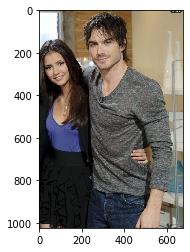

In [3]:
image= cv2.imread('test_1.jpg') # Readng the image
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Converting the image in 'RGB' format
plt.imshow(image)

Finding faces in the image

In [4]:
face_loc=fr.face_locations(image)
no_of_faces= len(face_loc)
print("Found {} face(s) in the input image!!".format(no_of_faces))

Found 2 face(s) in the input image!!


A face is located at 'Top': 24, 'Left': 225, 'Bottom': 153, 'Right': 354 pixels!
A face is located at 'Top': 218, 'Left': 116, 'Bottom': 373, 'Right': 270 pixels!


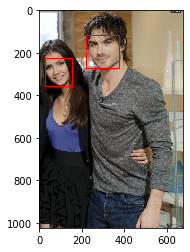

In [5]:
# Axis Handle
plt.imshow(image)
ax= plt.gca()

# Repeating the same for all the faces
# Printing location of face in the image
for face_location in face_loc:
    top,right,bottom,left= face_location
    x,y,w,h= left, top, right, bottom
    print("A face is located at 'Top': {}, 'Left': {}, 'Bottom': {}, 'Right': {} pixels!".format(x,y,w,h))
    
    # Drawing box around each face
    rect= Rectangle((x,y),w-x, h-y, fill=False, color= 'red')
    ax.add_patch(rect)
    
plt.show()

# Face Recognition
   Step 1: Extract or locate face, i.e., face detection
   
   Step 2: Representation of extracted face as features and creating a database for it
   
   Step 3: Comparison with the known faces
   
   Step 4: Computation of Euclidean distance and applying threshold to compare the match
   
   Euclidean distance is calculated as:  D= √(xi −yi)^2), 
         where, D= Distance and xi,yi are co-ordinates


Loading unknown images to create a database

In [6]:
image= cv2.imread('SSR_1.jpg')
ssr= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image= cv2.imread('Disha_1.jpg')
disha= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image= cv2.imread('Ian_1.jpg')
ian= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image= cv2.imread('Nina_1.jpeg')
nina= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image= cv2.imread('Paul_1.jpg')
paul= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [7]:
# Loading face encoding for each person. There can be a case where there is no face present. Thus this can fail
ssr_encoding= fr.face_encodings(ssr)[0]
disha_encoding= fr.face_encodings(disha)[0]
ian_encoding= fr.face_encodings(ian)[0]
nina_encoding= fr.face_encodings(nina)[0]
paul_encoding= fr.face_encodings(paul)[0]
# '[0]' is used to take the first face, in case more than 1 face is present.

# Creating a database, i.e., a list of all the faces, used as a feature for training
face_encoding= [ ssr_encoding,disha_encoding,ian_encoding,nina_encoding,paul_encoding]

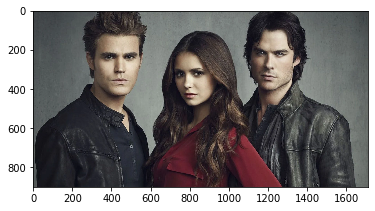

In [8]:
# Loading the image for testing
image= cv2.imread('test_4.jpg')
unknown= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown)
unknown_encoding= fr.face_encodings(unknown)

In [9]:
from scipy.spatial import distance

# We need to loop in the image as there can be more than 1 faces present in the given image
for unknown_face in unknown_encoding:
    #Testing if the face matches any of the 5 features
    results=[]
    for known_face in face_encoding:
        d= distance.euclidean(known_face, unknown_face)
        # In the above line, 'd' is the euclidean distance
        results.append(d)
    threshold= 0.6
    results= np.array(results)<= threshold
    
    name="Unknown"
    
    if results[0]:
        name="Sushant Singh Rajput"
    elif results[1]:
        name="Disha Patani"
    elif results[2]:
        name="Ian Somerhalder"
    elif results[3]:
        name="Nina Dobrev"
    elif results[4]:
        name="Paul Wesley"
        
    print("Found {} in the image provided!!".format(name))

Found Paul Wesley in the image provided!!
Found Nina Dobrev in the image provided!!
Found Ian Somerhalder in the image provided!!
